### Imports

In [1]:
from utils.utils import *

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import sys

/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/li

### Parameters

In [2]:
import json
  
# Opening JSON file
file = open("parameters.json")
params = json.load(file)

dir = os.path.dirname(os.getcwd())
print(dir)

method = params["method"][params["method_idx"]]
print("Method:\t\t", method)

group1 = params["group"][params["group1_idx"]]
print("Group1:\t\t", group1)

group2 = params["group"][params["group2_idx"]]
print("Group2:\t\t", group2)

dimensions = params["dimensions"]
dimension = dimensions[0]
print("Dimensions:\t", dimensions)

/home/ealvarez/Project/GNN_Filter
Method:		 vgae
Group1:		 ['WT', 5]
Group2:		 ['zwf1^', 3]
Dimensions:	 [3]


### Changes detection (Greedy algorithm)

#### Read edges

In [3]:
df_edges1 = pd.read_csv("{}/output_{}/edges_filter_weight_std_avg/{}_edge-filter-weight-std-avg_{}_{}.csv".format(dir, method, group1[0], dimension, "L2"))
df_edges1[["source", "target"]] = df_edges1[["source", "target"]].astype(str)
df_edges1

,source,target,weight
0,59.0291,417.322,0.749752
1,74.0249,115.0038,0.769802
2,74.0249,115.9206,0.662540
3,74.0249,116.0356,0.698872
4,74.0249,118.0721,0.776282
...,...,...,...
32059,978.5819,978.6174,0.702750
32060,978.5819,979.5239,0.789096
32061,978.6174,978.66,0.628246
32062,980.7146,981.7177,0.842014


In [4]:
G1 = nx.from_pandas_edgelist(df_edges1, "source", "target", edge_attr=["weight"])

In [5]:
# nx.draw_networkx(G1, pos=nx.spring_layout(G1), font_size=8, font_color="black")

In [6]:
df_edges2 = pd.read_csv("{}/output_{}/edges_filter_weight_std_avg/{}_edge-filter-weight-std-avg_{}_{}.csv".format(dir, method, group2[0], dimension, "L2"))
df_edges2[["source", "target"]] = df_edges2[["source", "target"]].astype(str)
df_edges2

,source,target,weight
0,59.0137,87.0086,0.739835
1,59.0137,98.9721,0.672081
2,59.0137,128.0572,0.696108
3,59.0137,142.0207,0.730919
4,59.0137,156.0779,0.705628
...,...,...,...
498867,986.7752,988.5664,0.686868
498868,987.5639,987.7787,0.730499
498869,987.5639,988.5664,0.732645
498870,987.7787,988.5664,0.703712


In [7]:
G2 = nx.from_pandas_edgelist(df_edges2, "source", "target", edge_attr=["weight"])

In [8]:
# nx.draw_networkx(G2, pos=nx.spring_layout(G2), font_size=8, font_color="black")

#### Get common subgraphs

Get subgraphs

In [11]:
common_edges = get_subgraphs([G1, G2])

Num. of common nodes: 2155
Num. of common edges: 9262


In [9]:
e1_inte_e2, e1_diff_e2, e2_diff_e1 = get_change_subgraphs(G1, G2, group1[0], group2[0])

Num. of common nodes: 2155
WT & zwf1^: 9262
WT - zwf1^: 22055
zwf1^ - WT: 209345


In [34]:
# nx.draw_networkx(H1, pos=nx.spring_layout(H1), font_color="w")

In [35]:
# nx.draw_networkx(H2, pos=nx.spring_layout(H2), font_color="w")

Get changes

In [10]:
df_subgraphs = pd.DataFrame(e1_inte_e2, columns=["source", "target"])
df_subgraphs

,source,target
0,308.0741,406.1095
1,641.5719,790.5593
2,797.5127,808.4612
3,174.0874,270.1452
4,785.4527,902.6546
...,...,...
9257,181.0719,544.2357
9258,857.5408,883.5481
9259,443.118,557.2083
9260,521.984,543.9612


In [38]:
df_subgraphs["weight1"] = df_subgraphs.apply(lambda x: H1.get_edge_data(x.source, x.target)["weight"], axis=1)
df_subgraphs["weight2"] = df_subgraphs.apply(lambda x: H2.get_edge_data(x.source, x.target)["weight"], axis=1)
df_subgraphs

,source,target,weight1,weight2
0,157.0621,423.1112,0.776478,0.800683
1,729.5255,887.4687,0.771786,0.656784
2,646.4528,689.4951,0.949762,0.951424
3,690.4982,880.5298,0.825929,0.834769
4,703.5109,950.4899,0.835806,0.729033
...,...,...,...,...
9257,222.0441,497.1259,0.733421,0.802790
9258,175.0612,408.012,0.684283,0.822000
9259,277.1814,397.2518,0.763885,0.878057
9260,483.1335,634.3195,0.856503,0.896205


In [39]:
list_subgraphs = []
for edge in e1_diff_e2:
    list_subgraphs.append([edge[0], edge[1], H1.get_edge_data(edge[0], edge[1])["weight"], np.nan])

for edge in e2_diff_e1:
    list_subgraphs.append([edge[0], edge[1], np.nan, H2.get_edge_data(edge[0], edge[1])["weight"]])

df_temp = pd.DataFrame(list_subgraphs, columns=["source", "target", "weight1", "weight2"])
df_subgraphs = pd.concat([df_subgraphs, df_temp])
df_subgraphs

,source,target,weight1,weight2
0,157.0621,423.1112,0.776478,0.800683
1,729.5255,887.4687,0.771786,0.656784
2,646.4528,689.4951,0.949762,0.951424
3,690.4982,880.5298,0.825929,0.834769
4,703.5109,950.4899,0.835806,0.729033
...,...,...,...,...
231395,412.9673,933.5053,NaN,0.711720
231396,254.9783,816.5741,NaN,0.637673
231397,244.1304,808.118,NaN,0.671185
231398,426.0221,513.1053,NaN,0.777109


In [40]:
df_subgraphs["difference"] = df_subgraphs["weight1"] - df_subgraphs["weight2"]
df_subgraphs["difference"] = df_subgraphs["difference"].abs()
df_subgraphs

,source,target,weight1,weight2,difference
0,157.0621,423.1112,0.776478,0.800683,0.024204
1,729.5255,887.4687,0.771786,0.656784,0.115002
2,646.4528,689.4951,0.949762,0.951424,0.001662
3,690.4982,880.5298,0.825929,0.834769,0.008840
4,703.5109,950.4899,0.835806,0.729033,0.106773
...,...,...,...,...,...
231395,412.9673,933.5053,NaN,0.711720,NaN
231396,254.9783,816.5741,NaN,0.637673,NaN
231397,244.1304,808.118,NaN,0.671185,NaN
231398,426.0221,513.1053,NaN,0.777109,NaN


In [41]:
# Add labels for correlaction changes

df_subgraphs["change"] = correlation_labels(df_subgraphs, threshold=0.8)
df_subgraphs.to_csv("{}/output_changes/subgraphs/{}_{}_subgraphs_{}_{}.csv".format(dir, group1[0], group2[0], dimension, "L2"), index=False)
df_subgraphs

,source,target,weight1,weight2,difference,change
0,157.0621,423.1112,0.776478,0.800683,0.024204,pP
1,729.5255,887.4687,0.771786,0.656784,0.115002,pp
2,646.4528,689.4951,0.949762,0.951424,0.001662,PP
3,690.4982,880.5298,0.825929,0.834769,0.008840,PP
4,703.5109,950.4899,0.835806,0.729033,0.106773,Pp
...,...,...,...,...,...,...
231395,412.9673,933.5053,NaN,0.711720,NaN,?p
231396,254.9783,816.5741,NaN,0.637673,NaN,?p
231397,244.1304,808.118,NaN,0.671185,NaN,?p
231398,426.0221,513.1053,NaN,0.777109,NaN,?p


In [42]:
df_subgraphs = pd.read_csv("{}/output_changes/subgraphs/{}_{}_subgraphs_{}_{}.csv".format(dir, group1[0], group2[0], dimension, "L2"))
df_subgraphs

,source,target,weight1,weight2,difference,change
0,157.0621,423.1112,0.776478,0.800683,0.024204,pP
1,729.5255,887.4687,0.771786,0.656784,0.115002,pp
2,646.4528,689.4951,0.949762,0.951424,0.001662,PP
3,690.4982,880.5298,0.825929,0.834769,0.008840,PP
4,703.5109,950.4899,0.835806,0.729033,0.106773,Pp
...,...,...,...,...,...,...
240657,412.9673,933.5053,NaN,0.711720,NaN,?p
240658,254.9783,816.5741,NaN,0.637673,NaN,?p
240659,244.1304,808.1180,NaN,0.671185,NaN,?p
240660,426.0221,513.1053,NaN,0.777109,NaN,?p


In [43]:
# Create subgraph

H = nx.from_pandas_edgelist(df_subgraphs, "source", "target", edge_attr=["change"], create_using=nx.DiGraph())
H.edges(data=True)

print(group1[0])
graph_detail(G1)

print(group2[0])
graph_detail(G2)

print("Subgraph")
graph_detail(H)

WT
Num. nodes: 2279
Num. edges: 32064

zwf1^
Num. nodes: 4887
Num. edges: 498872

Subgraph
Num. nodes: 2146
Num. edges: 240662



In [44]:
# nx.draw_networkx(H, pos=nx.spring_layout(H), font_color="w")

In [45]:
# degree_distibution([G1, G2, H], ["G1", "G2", "H"])

In [46]:
# sorted(H.degree, key=lambda x: x[1], reverse=True)

#### Filter and plot

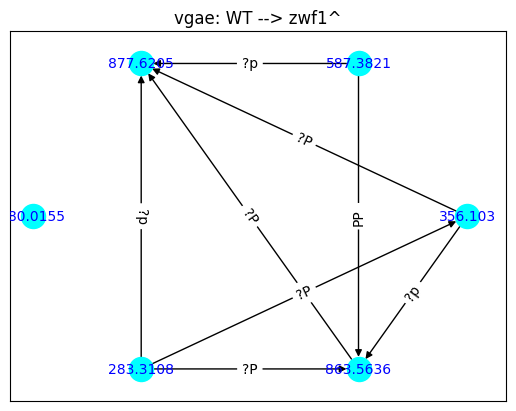

In [47]:
HF = H.subgraph([283.3108, 877.6205, 587.3821, 863.5636, 356.103, 980.0155])
edge_labels = nx.get_edge_attributes(HF, "change")

pos = pos=nx.circular_layout(HF)
nx.draw_networkx(HF, pos, font_color="blue", font_size=10, node_color="cyan")
nx.draw_networkx_edge_labels(H, pos, edge_labels)

plt.title("{}: {} --> {}".format(method, group1[0], group2[0]))
plt.show()

### BioCyc

#### Load metadata

In [86]:
# Load dataset
df_metadata = pd.read_excel("{}/input/Edwin_proyecto2/Edwin_Set2-processed.xlsx".format(dir), header=0, sheet_name=1)
print(df_metadata.shape)
df_metadata

(189, 8)


,Corrected (m/z),Metabolites - Approved by Nicola,Metabolites - Used by Florian,Theoretical - m/z (based on BioCyc),Chemical Formula (based on BioCyc),Adduct (negative mode),Error in mDa (oTOF),Error in PPM (Theoretical vs Corrected)
0,59.0137,Acetic acid,*,59.013568,C2H4O2,H,NaN,NaN
1,NaN,Acrylamide,*,70.029552,C3H5NO,H,NaN,NaN
2,71.0139,Acrylic acid,*,71.013568,C3H4O2,H,NaN,NaN
3,NaN,Tetrahydrophurane,*,71.049953,C4H8O,H,NaN,NaN
4,NaN,Propionic acid,*,73.029218,C3H6O2,H,NaN,NaN
...,...,...,...,...,...,...,...,...
184,NaN,C20H27N10O16P3,*,755.074660,C20H27N10O16P3,H,NaN,NaN
185,766.1076,Coenzyme A,*,766.107647,C21H36N7O16P3S,H,NaN,NaN
186,784.1495,FAD,*,784.149573,C27H33N9O15P2,H,NaN,NaN
187,808.1180,Acetyl coenzyme A,*,808.118211,C23H38N7O17P3S,H,NaN,NaN


In [87]:
df_metadata.dropna(subset=["Corrected (m/z)"], inplace=True)
df_metadata

,Corrected (m/z),Metabolites - Approved by Nicola,Metabolites - Used by Florian,Theoretical - m/z (based on BioCyc),Chemical Formula (based on BioCyc),Adduct (negative mode),Error in mDa (oTOF),Error in PPM (Theoretical vs Corrected)
0,59.0137,Acetic acid,*,59.013568,C2H4O2,H,NaN,NaN
2,71.0139,Acrylic acid,*,71.013568,C3H4O2,H,NaN,NaN
5,74.0249,Glycine,*,74.024467,C2H5NO2,H,NaN,NaN
6,85.0296,Methyl Acrylate,*,85.029218,C4H6O2,H,NaN,NaN
7,87.0086,Pyruvic acid,*,87.008482,C3H4O3,H,NaN,NaN
...,...,...,...,...,...,...,...,...
181,664.1170,Nicotinamide adenine dinucleotide,*,664.117210,C21H29N7O14P2,H,NaN,NaN
182,665.2139,C33H36N6O7 + K,*,665.214297,C24H42O21,H,NaN,NaN
185,766.1076,Coenzyme A,*,766.107647,C21H36N7O16P3S,H,NaN,NaN
186,784.1495,FAD,*,784.149573,C27H33N9O15P2,H,NaN,NaN


In [88]:
df_metadata.set_index("Corrected (m/z)", inplace=True)
df_metadata

,Metabolites - Approved by Nicola,Metabolites - Used by Florian,Theoretical - m/z (based on BioCyc),Chemical Formula (based on BioCyc),Adduct (negative mode),Error in mDa (oTOF),Error in PPM (Theoretical vs Corrected)
Corrected (m/z),,,,,,,
59.0137,Acetic acid,*,59.013568,C2H4O2,H,NaN,NaN
71.0139,Acrylic acid,*,71.013568,C3H4O2,H,NaN,NaN
74.0249,Glycine,*,74.024467,C2H5NO2,H,NaN,NaN
85.0296,Methyl Acrylate,*,85.029218,C4H6O2,H,NaN,NaN
87.0086,Pyruvic acid,*,87.008482,C3H4O3,H,NaN,NaN
...,...,...,...,...,...,...,...
664.1170,Nicotinamide adenine dinucleotide,*,664.117210,C21H29N7O14P2,H,NaN,NaN
665.2139,C33H36N6O7 + K,*,665.214297,C24H42O21,H,NaN,NaN
766.1076,Coenzyme A,*,766.107647,C21H36N7O16P3S,H,NaN,NaN


In [90]:
# List of nodes
list_nodes_subgraphs = df_metadata.index.values
print(len(list_nodes_subgraphs))
list_nodes_subgraphs

85


array([ 59.0137,  71.0139,  74.0249,  85.0296,  87.0086,  88.0405,
        89.0245, 101.0243, 102.0562, 109.0407, 112.0518, 113.0246,
       115.0038, 117.0195, 118.051 , 118.9807, 122.0247, 128.0355,
       129.0192, 130.0506, 130.0875, 131.0355, 131.0824, 132.0303,
       133.014 , 135.0311, 145.0144, 145.0617, 145.0984, 146.0458,
       147.0297, 147.0655, 151.0403, 152.0354, 153.0173, 154.062 ,
       165.0554, 166.0506, 166.9758, 168.0663, 171.0302, 173.0095,
       173.0454, 173.0711, 179.0348, 179.0561, 184.0021, 186.1139,
       211.0603, 213.0145, 218.1033, 225.0991, 237.0282, 249.0552,
       251.0776, 259.0227, 266.0886, 279.2331, 307.0311, 316.2857,
       317.2143, 323.0277, 338.9889, 346.0558, 347.0589, 362.0509,
       365.0531, 367.0185, 388.9441, 397.1319, 401.0173, 426.0221,
       441.3372, 489.9937, 505.9889, 521.984 , 545.3994, 604.0696,
       606.0744, 611.144 , 664.117 , 665.2139, 766.1076, 784.1495,
       808.118 ])

#### Load process data

In [91]:
df_subgraphs = pd.read_csv("{}/output_changes/subgraphs/{}_{}_subgraphs_{}_{}.csv".format(dir, group1[0], group2[0], dimension, "L2"))
print(group1[0], "-", group2[0])
df_subgraphs

WT - zwf1^


,source,target,weight1,weight2,difference,change
0,157.0621,423.1112,0.776478,0.800683,0.024204,pP
1,729.5255,887.4687,0.771786,0.656784,0.115002,pp
2,646.4528,689.4951,0.949762,0.951424,0.001662,PP
3,690.4982,880.5298,0.825929,0.834769,0.008840,PP
4,703.5109,950.4899,0.835806,0.729033,0.106773,Pp
...,...,...,...,...,...,...
240657,412.9673,933.5053,NaN,0.711720,NaN,?p
240658,254.9783,816.5741,NaN,0.637673,NaN,?p
240659,244.1304,808.1180,NaN,0.671185,NaN,?p
240660,426.0221,513.1053,NaN,0.777109,NaN,?p


In [94]:
# count of kind chane
type_changes = df_subgraphs["change"].value_counts()
type_changes.to_frame()

,count
change,
?p,149518
?P,59827
p?,12942
P?,9113
PP,3437
pp,2349
pP,2229
Pp,1247


#### Get metabolite name

In [98]:
# list_nodes_subgraphs_filter = np.unique(np.concatenate((df_subgraphs["source"].values, df_subgraphs["target"].values)))
list_nodes_subgraphs_filter = [59.0137,  71.0139,  74.0249,  85.0296,  87.0086,  88.0405, 89.0245, 101.0243, 102.0562, 109.0407, 112.0518, 113.0246]
list_nodes_subgraphs_filter

[59.0137,
 71.0139,
 74.0249,
 85.0296,
 87.0086,
 88.0405,
 89.0245,
 101.0243,
 102.0562,
 109.0407,
 112.0518,
 113.0246]

In [99]:
list_metabolite = df_metadata.loc[list_nodes_subgraphs_filter, ["Metabolites - Approved by Nicola", "Chemical Formula (based on BioCyc)"]]
list_metabolite

,Metabolites - Approved by Nicola,Chemical Formula (based on BioCyc)
Corrected (m/z),,
59.0137,Acetic acid,C2H4O2
71.0139,Acrylic acid,C3H4O2
74.0249,Glycine,C2H5NO2
85.0296,Methyl Acrylate,C4H6O2
87.0086,Pyruvic acid,C3H4O3
88.0405,Alanine,C3H7NO2
89.0245,Lactic acid / Glyceraldehyde,C3H6O3
101.0243,Acetoacetic acid,C4H6O3
102.0562,Amino-butyric acid,C4H9NO2


In [ ]:
# Get formula by node id into clusters and save one by one
df_metabolite = pd.DataFrame()
for k in range(len(clusters_k.sizes())):
  # before = df_raw1.loc[clusters_k.subgraph(k).vs["name"]].mean(axis=1).values
  # after = df_raw2.loc[clusters_k.subgraph(k).vs["name"]].mean(axis=1).values

  before = df_process1[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values
  after = df_process2[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values

  df_cluster_formula = pd.DataFrame({# "Alignment": clusters_k.subgraph(k).vs["name"],
                                     # "INCHIKEY": list_metabolite_formula["INCHIKEY"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     # "Formula": list_metabolite_formula["Chemical Formula (based on BioCyc)"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     "Metabolities": list_metabolite_formula["Metabolites - Approved by Nicola"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     "Before": np.log10(before),
                                     "After": np.log10(after),
                                     "Ratio": np.log10(np.divide(after, before))})
  df_metabolite = pd.concat([df_metabolite, df_cluster_formula])
  # Save
  df_cluster_formula.to_csv("outputs/clusters/metabolite/df_biocyc_full_cluster{}_metabolities_ratio_{}_{}_{}_{}.csv".format(k + 1, G1_name, G2_name, threshold1, threshold3), index=None, sep="\t")
  print(df_cluster_formula)
  print()

df_metabolite.to_csv("outputs/clusters/metabolite/df_biocyc_full_metabolities_ratio_{}_{}_{}_{}.csv".format(G1_name, G2_name, threshold1, threshold3), index=None, sep="\t")